In [25]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt


In [26]:
os.chdir("../python-api-challenge")

In [27]:
from config import api_key

In [28]:
from datetime import date

today = date.today()

d1 = today.strftime("%m/%d/%Y")
print("Today's Date:", d1)

Today's Date: 01/18/2021


In [29]:
# create list of random latitudes evenly distributed across globe

lat = np.random.uniform(low=-90.000, high=90.000, size=2000)

In [30]:
# create list of random longitudes evenly distributed across globe

long = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [31]:
# combine lat and long

latlong = zip(lat, long)

In [32]:
# create list of latitude and longitude combinations 

coordinates=list(latlong)

In [33]:
latlong

In [34]:
coordinates

[(50.20560936288916, 86.26894547885809),
 (36.91520708361017, 99.10646946651696),
 (-21.10282625978337, -90.90890987491784),
 (85.60679556238995, 169.43178318426357),
 (66.33952109918482, -1.9071075070672805),
 (59.438102653741424, 131.06275869873775),
 (69.76702734819298, -53.20100698421386),
 (-6.0746515878797425, -161.66835076542765),
 (-30.594067242616184, 130.71579275973795),
 (34.04840385929779, 168.27588406235162),
 (-12.225937957901493, -38.037776432956946),
 (49.038966904834325, 71.60724648919958),
 (89.81057035165878, 128.17306654248625),
 (-59.523760255178374, 124.83674810162375),
 (33.05243135279822, 77.96039702725147),
 (38.76596549719855, 42.60962269944838),
 (-34.22185027691536, 137.49770985390455),
 (20.24668387423162, 76.35689142751295),
 (75.74330247898683, 178.49913077921883),
 (-73.48271797154929, 92.11957501672583),
 (9.524994036188872, 32.05848137852507),
 (-33.718067244481574, 75.3990135833761),
 (-34.88975497982297, 156.20652924140336),
 (76.52394459945137, 24.0

In [35]:
# create empty lists to be populated in loops

cities=[]

city_name=[]
country=[]
city_id=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]

In [36]:
# populate cities list

for x in coordinates:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)
  

In [37]:
# create vairable for base url to be used when making api calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# city = []



In [38]:
# loop through city names and create unique api calls for each city
# populate lists for desired fields from returned json
# skip cities that so not result in a successful api call

for city in cities:

    query_url = url + "&appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()

    try:
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        city_id.append(weather_response["id"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        print(city, "success")
    except:
        print(city, "CITY NOT FOUND!")
    pass


onguday success
zhangye success
pisco success
pevek success
brae success
chagda CITY NOT FOUND!
aasiaat success
samusu CITY NOT FOUND!
flinders success
severo-kurilsk success
entre rios success
atasu success
tiksi success
albany success
manali success
ahlat success
port pirie success
chikhli success
leningradskiy success
busselton success
malakal success
bambous virieux success
nelson bay success
havoysund success
kahului success
jamestown success
isangel success
te anau success
toba success
emden success
hithadhoo success
puerto escondido success
beloha success
avarua success
dikson success
atuona success
juneau success
muros success
zhanatas CITY NOT FOUND!
baracoa success
hilo success
puerto ayora success
shelburne success
nevers success
enid success
rikitea success
barcelos success
elliot lake success
constitucion success
vaini success
taolanaro CITY NOT FOUND!
kavaratti success
ushuaia success
tuatapere success
nikolskoye success
yatou success
bethel success
narsaq success
malisbo

In [39]:
# create pandas dataframe from lists populated by series of api calls

results_df=pd.DataFrame({"City":pd.Series(city_name), 
                         "Country":pd.Series(country),
                         "ID":pd.Series(city_id),
                         "Latitude":pd.Series(latitude), 
                         "Longitude":pd.Series(longitude), 
                         "Max Temp":pd.Series(max_temp), 
                         "Humidity":pd.Series(humidity), 
                         "Wind Speed":pd.Series(wind_speed),
                         "Cloudiness":pd.Series(cloudiness)
                        })

results_df

,City,Country,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Onguday,RU,1496130,50.7500,86.1500,23.76,85,1.57,100
1,Zhangye,CN,1785036,38.9342,100.4517,14.65,75,1.50,0
2,Pisco,PE,3932145,-13.7000,-76.2167,75.20,73,5.75,0
3,Pevek,RU,2122090,69.7008,170.3133,-29.07,86,5.95,89
4,Brae,GB,2654970,60.3964,-1.3530,41.00,87,18.41,90
...,...,...,...,...,...,...,...,...,...
690,Imeni Poliny Osipenko,RU,2023584,52.4201,136.4853,-26.75,86,4.18,75
691,Ndjolé,GA,2397674,-0.1783,10.7649,75.60,92,2.48,100
692,Yerbogachën,RU,2012956,61.2767,108.0108,-24.30,85,9.55,100
693,‘Āhuimanu,US,5856516,21.4447,-157.8378,73.40,83,31.07,90


In [40]:
# export dataframe to a csv file

results_df.to_csv("WeatherPy/results.csv")

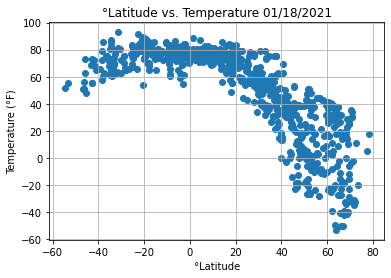

In [41]:
plt.scatter(results_df["Latitude"], results_df["Max Temp"])
plt.title(f"°Latitude vs. Temperature {d1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/max_temp.png")

<h1> °Latitude vs. Temperature <h1>
<h3>Not surprisingly, the highest temeratures are nearest the equator.  Since nearly 70% of the planets land is in the northern hemisphere, it makes sense that there are significantly fewer data points in the southern hemisphere.  The seasonal tilt of the Earths axis likely is the cause for relatively higher temps in the south compared to the north.<h3>

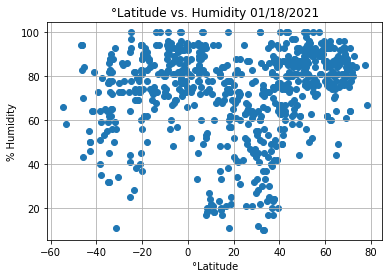

In [42]:
plt.scatter(results_df["Latitude"], results_df["Humidity"])
plt.title(f"°Latitude vs. Humidity {d1}")
plt.ylabel("% Humidity")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/humidity.png")

<h1> °Latitude vs. Humidity <h1>
<h3>Beyond a slight concentration of zero humidity locations, there appears to be little correlation between latitude and humidity levels.<h3>

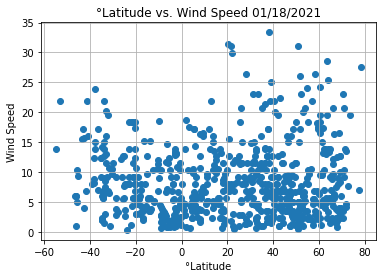

In [43]:
plt.scatter(results_df["Latitude"], results_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed {d1}")
plt.ylabel("Wind Speed")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/wind_speed.png")

<h1> °Latitude vs. Wind Speed <h1>
<h3>Althought the extreme northern latitudes do indicate an increased possibility of some of the higher wind speeds, most of the data indicates little correlation. It is important to note that we lack data points from the extreme southern latitudes that may better bring this significance into focus<h3>

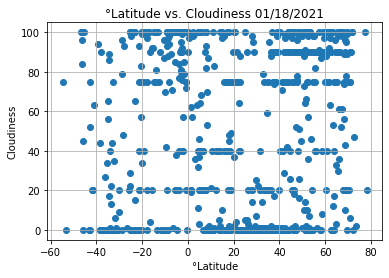

In [44]:
plt.scatter(results_df["Latitude"], results_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness {d1}")
plt.ylabel("Cloudiness")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/cloudiness.png")

<h1> °Latitude vs. Cloudiness <h1>
<h3>There appears to be no significant direct correlation between latitude and cloudiness.s<h3>

In [45]:
# create dataframe of cities in the northern hemisphere

north_hem = results_df.Latitude >= 0
north_df = results_df[north_hem]
north_df
north_df.to_csv("WeatherPy/north_df.csv")

In [46]:
# create dataframe of cities in the southern hemisphere

south_hem = results_df.Latitude < 0
south_df = results_df[south_hem]
south_df
south_df.to_csv("WeatherPy/south_df.csv")

In [47]:
from scipy import stats

def stats_linregress(x,y):
    res = stats.linregress(x,y)
    plt.plot(x, y, "+", label="Cities")
    plt.plot(x, res.intercept + res.slope* x, "r", label="Linear Regression", color="magenta")
    plt.legend()
    plt.xlabel("°Latitude")
    print(f"R-squared: {res.rvalue**2:.6f}")
#     plt.show()

# res = stats.linregress(south_df["Latitude"], south_df["Wind Speed"])

R-squared: 0.670509


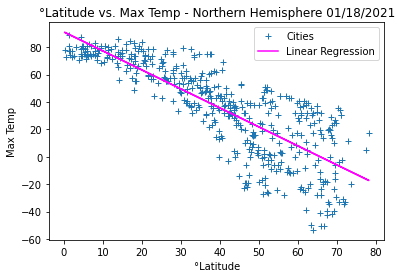

In [48]:
north_temp = stats_linregress(north_df["Latitude"], north_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Northern Hemisphere {d1}")
plt.ylabel("Max Temp")
plt.savefig("figures/north_temp.png")
# plt.show()


R-squared: 0.189510


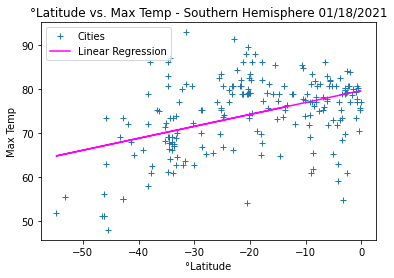

In [49]:
south_temp = stats_linregress(south_df["Latitude"], south_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Southern Hemisphere {d1}")
plt.ylabel("Max Temp")
# plt.show()
plt.savefig("figures/south_temp.png")

<h2>°Latitude vs. Max Temp<h2>
<img src="../figures/north_temp.png" height:50px/>
<img src="../figures/south_temp.png" height:50px/>
<h3>There is a much tighter coorelation to betweem max temp and latitude in the northern hemisphere.  This is likely due to the amount of data points and the relative diversity of the land dispersion in the southern hemisphere.<h3>


R-squared: 0.127537


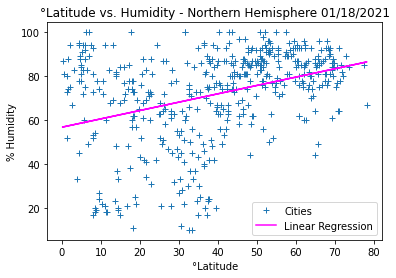

In [50]:
north_humidity = stats_linregress(north_df["Latitude"], north_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Northern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/north_humidity.png")
# plt.show()

R-squared: 0.151049


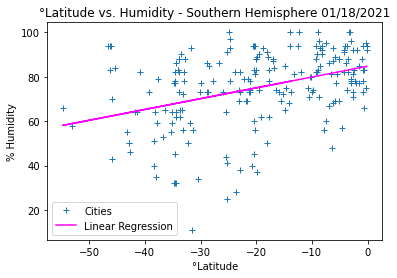

In [51]:
south_humidity = stats_linregress(south_df["Latitude"], south_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Southern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/south_humidity.png")
# plt.show()


<h2>°Latitude vs. Humidity<h2>
<img src="../figures/north_humidity.png" height:50px/>
<img src="../figures/south_humidity.png" height:50px/>
<h3>Although there is a a loose coorelation between latitude and humidity, and that the coorelation is similiar between the hemispheres, nearly all levels of humidity are present at all latitudes.<h3>

R-squared: 0.000877


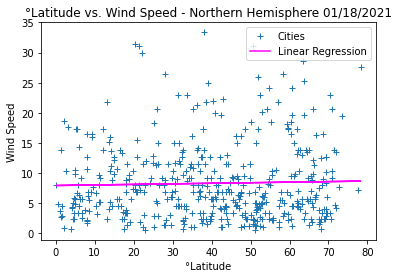

In [52]:
north_wind = stats_linregress(north_df["Latitude"], north_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Northern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/north_wind.png")
# plt.show()

R-squared: 0.117262


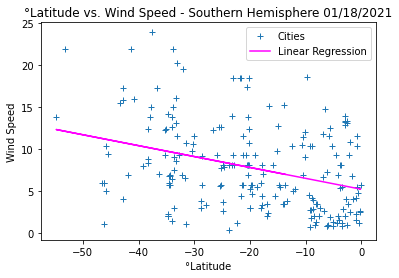

In [53]:
south_wind = stats_linregress(south_df["Latitude"], south_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Southern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/south_wind.png")
# plt.show()


<h2>°Latitude vs. Wind Speed<h2>
<img src="../figures/north_wind.png" height:50px/>
<img src="../figures/south_wind.png" height:50px/>
<h3>There is not a notable coorelation between latitude and wind speed.<h3>

R-squared: 0.082726


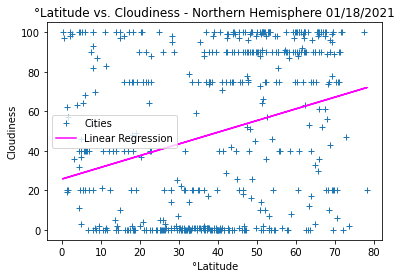

In [54]:
north_cloudiness = stats_linregress(north_df["Latitude"], north_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Northern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/north_cloudiness.png")
# plt.show()

R-squared: 0.185250


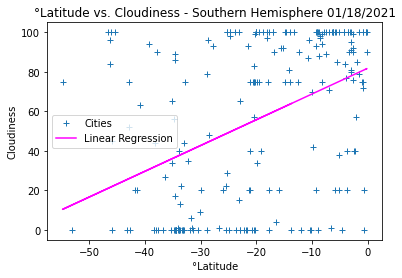

In [55]:
south_cloudiness = stats_linregress(south_df["Latitude"], south_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Southern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/south_cloudiness.png")
# plt.show()


<h2>°Latitude vs. Cloudiness<h2>
<img src="../figures/north_cloudiness.png" height:50px/>
<img src="../figures/south_cloudiness.png" height:50px/>
<h3>There is not a notable coorelation between latitude and cloudiness.<h3>